# ABR équilibrés: les AVL

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from arbres import Noeud, graphe_arbre, structure

---
## Exercice 0

Construire un arbre complètement aléatoire (pas forcément un ABR), dont la taille est précisée.

In [3]:
from random import randint

def insertion_aléatoire(a, valeur):
    """
    Place un nouveau noeud avec la valeur donnée dans l'arbre binaire a, aléatoirement.
    """
    
    ...

In [4]:
def arbre_aléatoire(n):
    """
    Construit un arbre binaire complètement aléatoire contenant n noeuds.
    """
    
    ...

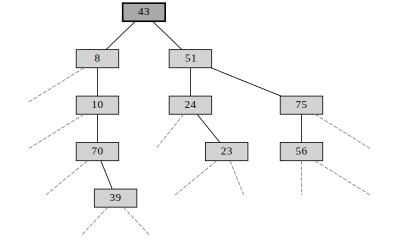

In [7]:
a = arbre_aléatoire(10)
display(graphe_arbre(a, largeur=14))

---
## Exercice 1

1. Écrire une fonction `minimax_ABR(a)` qui prend pour paramètre un arbre binaire (pas forcément un ABR) non vide, et renvoie 3 valeurs:
* sa valeur minimale;
* sa valeur maximale;
* un booléen indiquant s'il s'agit d'un ABR.

2. En déduire une fonction `est_ABR(a)` qui renvoie un booléen testant si un arbre binaire (potentiellement vide) est un ABR ou non.

In [3]:
def minimum_ABR(a):
    """
    Recherche le minimum dans l'ABR a
    """
    
    ...

In [4]:
def maximum_ABR(a):
    """
    Recherche le maximum dans l'ABR a
    """
    
    ...

In [6]:
def minimum(a):
    """
    Renvoie le minimum de l'arbre binaire a (qui n'est PAS un ABR) dont les valeurs
    sont comparables. a est supposé non vide.
    """
    
    ...

In [7]:
def maximum(a):
    """
    Renvoie le maximum de l'arbre binaire a (qui n'est PAS un ABR) dont les valeurs
    sont comparables. a est supposé non vide.
    """
    
    ...

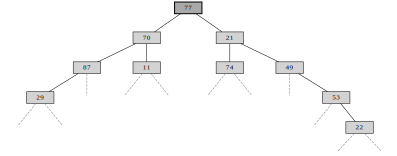

Le minimum de cet arbre est 11, son maximum est 87.


In [12]:
a = arbre_aléatoire(10)
display(graphe_arbre(a, largeur=14))
print("Le minimum de cet arbre est {}, son maximum est {}.".format(minimum(a), maximum(a)))

In [8]:
def minimaxi(a):
    """
    Renvoie le minimum et le maximum de l'arbre binaire NON VIDE a, dont les valeurs
    sont comparables.
    
    Attention, a n'est pas un ABR.
    """
    
    ...

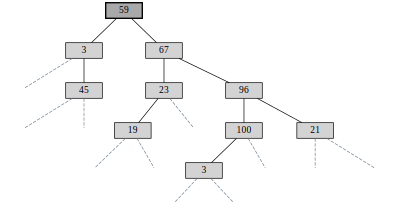

Le minimum de cet arbre est 3, son maximum est 100.


In [14]:
a = arbre_aléatoire(10)
display(graphe_arbre(a, largeur=14))
m, M = minimaxi(a)
print("Le minimum de cet arbre est {}, son maximum est {}.".format(m, M))

In [9]:
def minimaxi_ABR(a):
    """
    Renvoie le minimum et le maximum de l'arbre binaire NON VIDE a, dont les valeurs
    sont comparables, ainsi qu'un booléen spécifiant si a est un ABR.
    
    Attention, a n'est pas un ABR.
    """
    
    ...

In [10]:
def est_ABR(a):
    ...

In [11]:
def insertion_ABR(x, a):
    """
    Insère la nouvelle valeur x dans l'ABR dont la racine est a.
    """
    
    ...

In [18]:
N = 1000

for _ in range(100):
    t = [randint(-1000, 1000) for _ in range(N)]
    mini = min(t)
    maxi = max(t)
    
    a = None
    for v in t:
        a = insertion_ABR(v, a)
        
    assert est_ABR(a)

---
## Exercice 2

1. Écrire une fonction `rotation_droite(a)` réalisant l'opération suivante:
* On part de l'arbre 

  ![](images/rotation-gauche.png)
* ...pour arriver à l'arbre 

  ![](images/rotation-droite.png)

In [12]:
def rotation_droite(a):
    ...

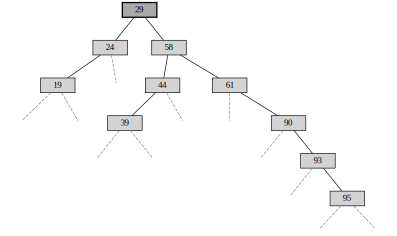

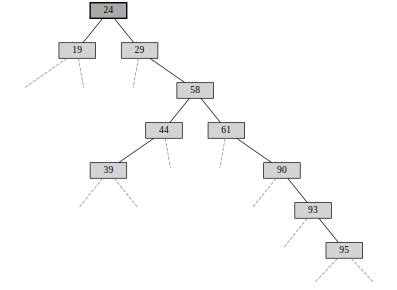

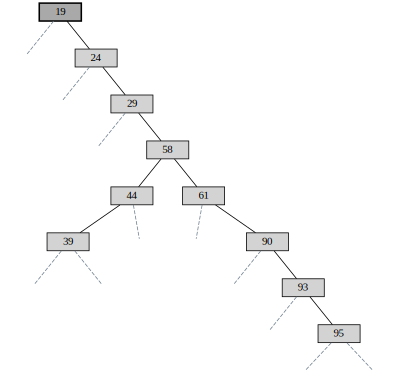

In [20]:
N = 10

a = None
for _ in range(10):
    a = insertion_ABR(randint(1, 100), a)

display(graphe_arbre(a, largeur=14))
while not a.gauche is None:
    a = rotation_droite(a)
    display(graphe_arbre(a, largeur=14))

2. Écrire une fonction `rotation_gauche(a)` qui réalise exactement l'opération inverse:
* On part de l'arbre 

  ![](images/rotation-droite.png)
* ...pour arriver à l'arbre 

  ![](images/rotation-gauche.png)

In [13]:
def rotation_gauche(a):
    ...

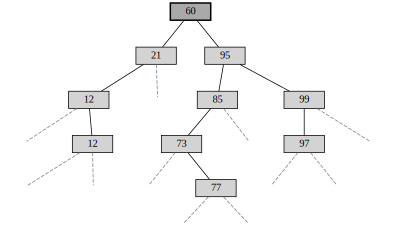

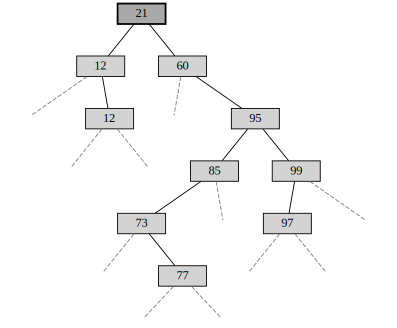

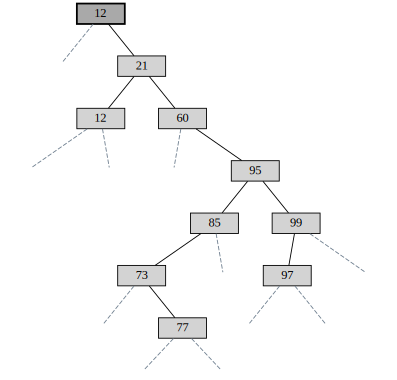

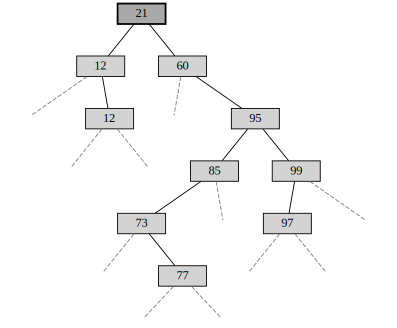

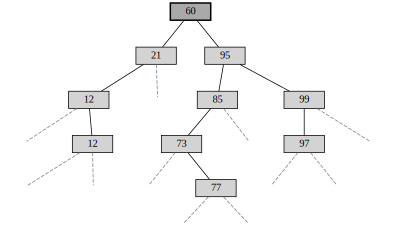

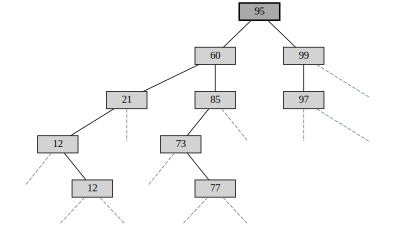

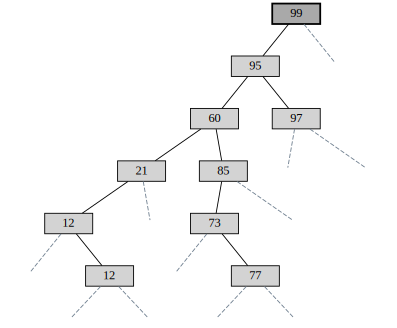

In [22]:
N = 10

a = None
for _ in range(10):
    a = insertion_ABR(randint(1, 100), a)

display(graphe_arbre(a, largeur=14))
while not a.gauche is None:
    a = rotation_droite(a)
    display(graphe_arbre(a, largeur=14))
    
while not a.droite is None:
    a = rotation_gauche(a)
    display(graphe_arbre(a, largeur=14))
    


3. Justifiez que les rotations à gauche et à droite donnent bien des ABR en sortie (si on leur fournit des ABR en entrée).

## Exercice 3 - les AVL

Un [AVL](https://fr.wikipedia.org/wiki/Arbre_AVL) sont un type particulier d'arbres binaires de recherches, pour lesquels ont maintient un certain équilibre.

Plus précisément, un AVL est un ABR ayant la condition supplémentaire que la différence de hauteur entre ses sous-arbres gauche et droit est au maximum de 1: l'arbre est soit équilibré, soit quasiment équilibré.

In [14]:
def hauteur(a):
    if a is None:
        return 0
    else:
        return 1 + max(hauteur(a.gauche), hauteur(a.droite))

In [15]:
def est_AVL(a):
    """
    Renvoie un booléen spécifiant si a est un AVL ou non.
    """
    
    ...

### Insertion dans un AVL

Pour insérer un nouvel élément dans un AVL, il est nécessaire de maintenir la condition de quasi-équilibre, car celle-ci pourrait être brisée.

On procède comme suit:

* On insère l'élément `e` dans l'arbre suivant la procédure (récursive) habituelle.
* Après avoir inséré `e` dans l'arbre, on calcule la différence de hauteur entre les sous-arbres gauche et droit.
  * Si cette différence est -1, 0 ou 1, on a encore un AVL, on ne fait rien de plus;
  * Si cette différence est -2 ou +2, on a un arbre trop déséquilibré, il faut donc le rééquilibrer. On a 4 possibilités:
    1. Si la différence est -2 (c'est le sous-arbre gauche qui a une hauteur dépassant de 2) et que l'élément `e` a été inséré à gauche du sous-arbre gauche,
    on part de cet arbre:
    
    ![](images/gauche-gauche-1.png)
    
    pour arriver (par une rotation à droite) à cet arbre:
    
    ![](images/gauche-gauche-2.png)
    
    1. Si la différence est -2 mais que l'élément 'e' a été inséré à droite du sous-arbre gauche, on part de cet arbre:
    
    ![](images/gauche-droite-1.png)
    
    pour passer par cet arbre (par une rotation à gauche):
    
    ![](images/gauche-droite-2.png)
    
    et finalement arriver à celui-ci (par une rotation à droite):
    
    ![](images/gauche-droite-3.png)
    
    1. Si la différence est +2 et que `e` a été inséré à gauche du sous-arbre droit, on part de cet arbre:
    
    ![](images/droite-gauche-1.png)
    
    pour passer par cet arbre (par une rotation à droite):
    
    ![](images/droite-gauche-2.png)
    
    et finalement arriver à celui-ci (par une rotation à gauche):
    
    ![](images/droite-gauche-3.png)
    
    1. Enfin, si la différence est +2 et que `e` a été inséré à droite du sous-arbre droit, on part de cet arbre:
    
    ![](images/droite-droite-1.png)
    
    pour passer par cet arbre (par une rotation à gauche):
    
    ![](images/droite-droite-2.png) 
    

1. Écrivez la fonction `est_AVL(a)` qui teste si un arbre binaire est un AVL ou non.
1.Implémentez la fonction `insertion_AVL(e, a)` qui utilise cet algorithme.

In [16]:
def insertion_AVL(x, a):
    """
    Insère la nouvelle valeur x dans l'AVL dont la racine est a, tout en maintenant la condition de quasi-équilibre.
    """
    
    ...

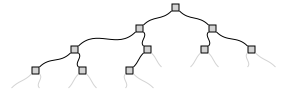

In [33]:
a = None
for _ in range(10):
    v = randint(1, 100)
    #print("Insertion de {}:\n\n".format(v))
    a = insertion_AVL(v, a)
    #display(graphe_arbre(a))
structure(a)